# Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importing the dataset using pandas

In [2]:
df = pd.read_csv('diamonds.csv')
df.rename(columns={'cut': 'cut_quality', 'x': 'length_mm',
                   'y': 'width_mm', 'z': 'height_mm'}, inplace=True)
df.head()


,carat,cut_quality,color,clarity,depth,table,price,length_mm,width_mm,height_mm
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# EDA

In [3]:
df.describe()

,carat,depth,table,price,length_mm,width_mm,height_mm
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        53940 non-null  float64
 1   cut_quality  53940 non-null  object 
 2   color        53940 non-null  object 
 3   clarity      53940 non-null  object 
 4   depth        53940 non-null  float64
 5   table        53940 non-null  float64
 6   price        53940 non-null  int64  
 7   length       53940 non-null  float64
 8   width        53940 non-null  float64
 9   height       53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


## Univariate Analysis

In [3]:
num_df = df.select_dtypes(exclude=[np.object])
cat_df = df.select_dtypes(exclude=[np.float64, np.int64])


### Histogram

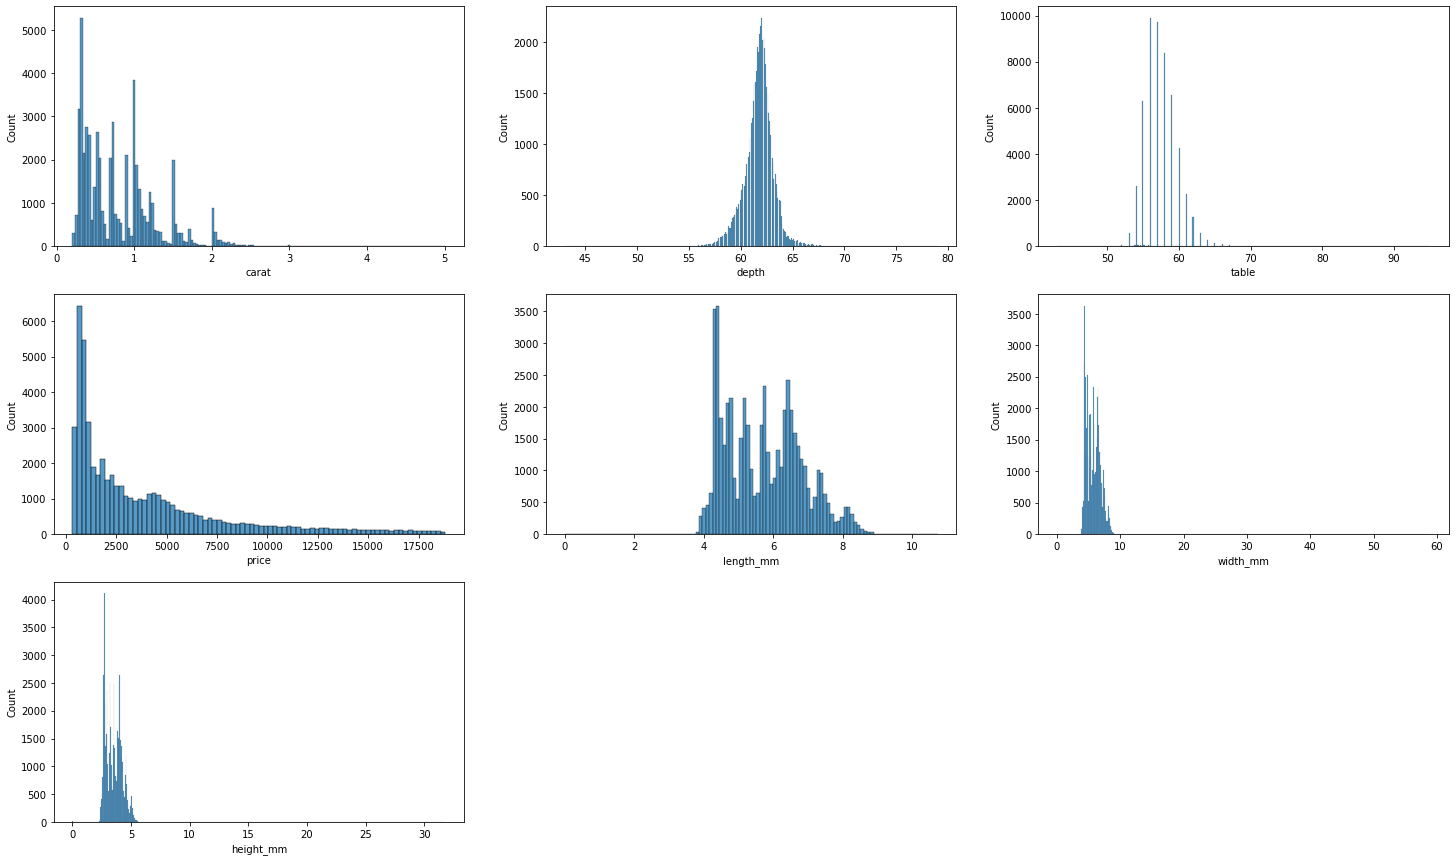

In [11]:
plt.subplots(figsize=(25, 15))
count = 1
while(count < 8):
    for i in num_df.columns:
        plt.subplot(3, 3, count)
        sns.histplot(x=df[i])
        count += 1
plt.show()


### Skewness

In [16]:
# Skewness
print("Skewness of the numerical features:\n",df.select_dtypes(exclude=[np.object]).skew())


Skewness of the numerical features:
 carat        1.116646
depth       -0.082294
table        0.796896
price        1.618395
length_mm    0.378676
width_mm     2.434167
height_mm    1.522423
dtype: float64


**Observation**:
- The *price* feature is right skewed.
- The *depth* feature is very close to a normal distribution.
- Since the *price* is right skewed, the predictive model will be more effective in predicting the lower prices.

### Boxplots

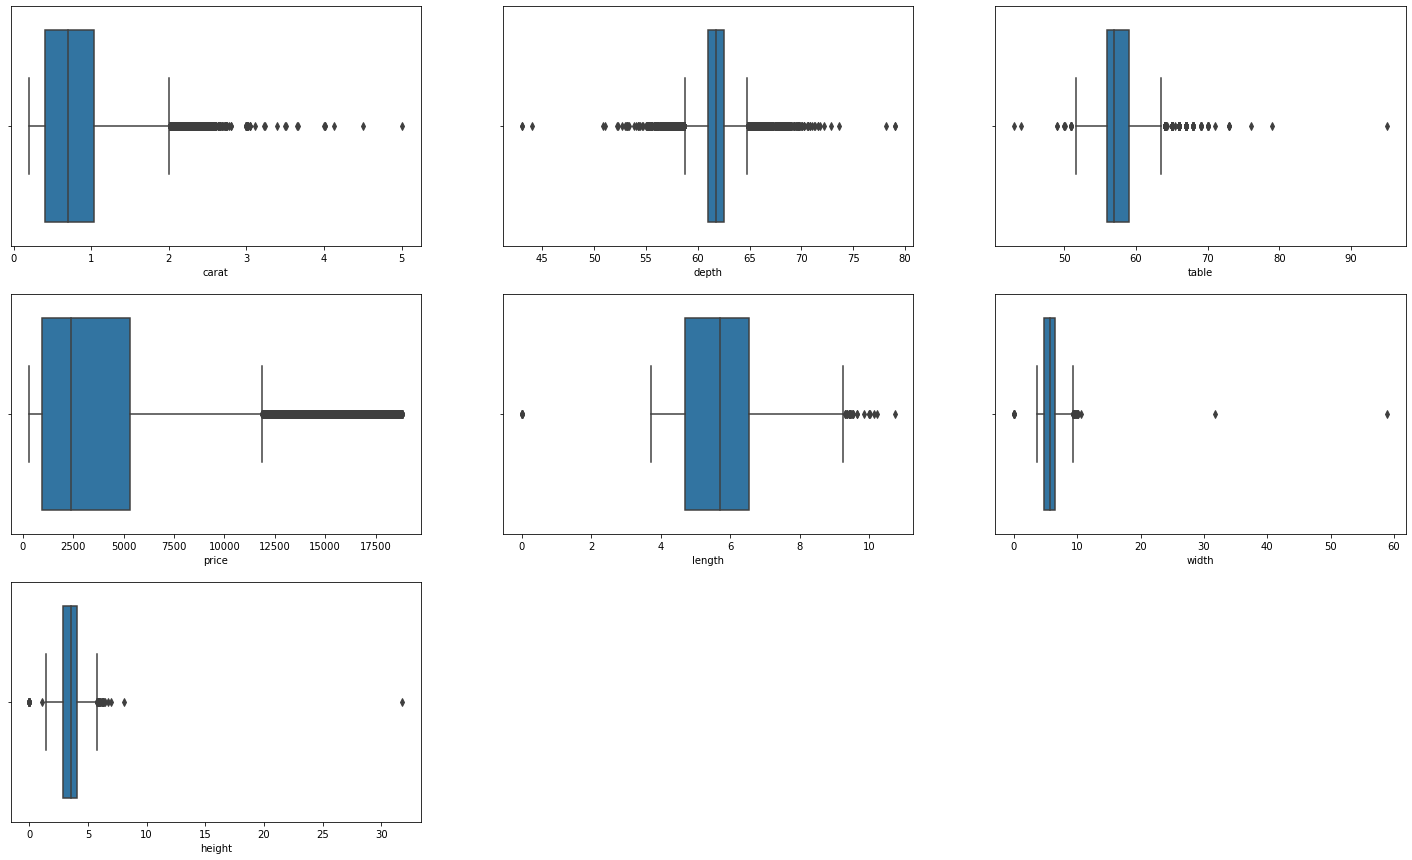

In [26]:
plt.subplots(figsize=(25, 15))
count = 1
while(count < 8):
    for i in num_df.columns:
        plt.subplot(3, 3, count)
        sns.boxplot(x=df[i])
        count += 1
plt.show()


**Observation**:
There are many outliers in the dataset and removing these outliers is very important before proceeding with the model training and evaluation.

### Heatmap

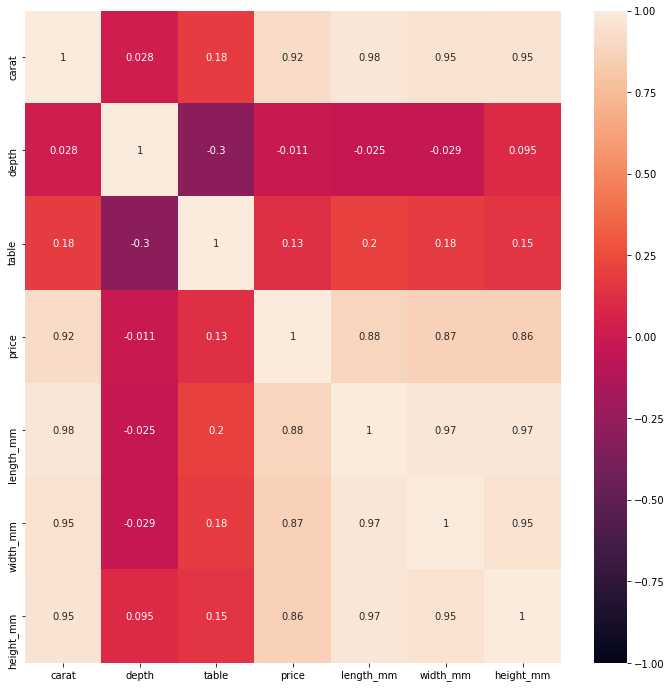

In [18]:
# Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(data=num_df.corr(), vmin=-1, vmax=+1, annot=True)
plt.show()

**Observation**:
- The price is highly influenced by carat, length, width and height features.

### Barplot Categorical features

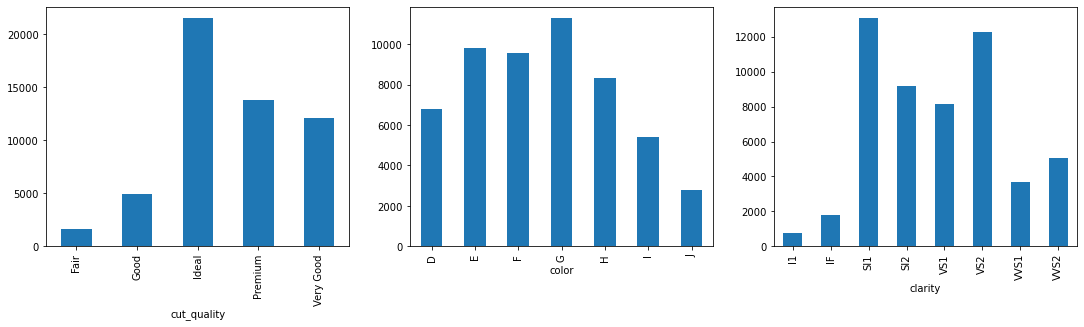

In [28]:
count = 1
plt.subplots(figsize=(25, 15))
for i in cat_df.columns:
    plt.subplot(3, 4, count)
    cat_df.groupby(i).size().plot.bar()
    count += 1

plt.show()


## Bivariate Analysis

### Pairplot

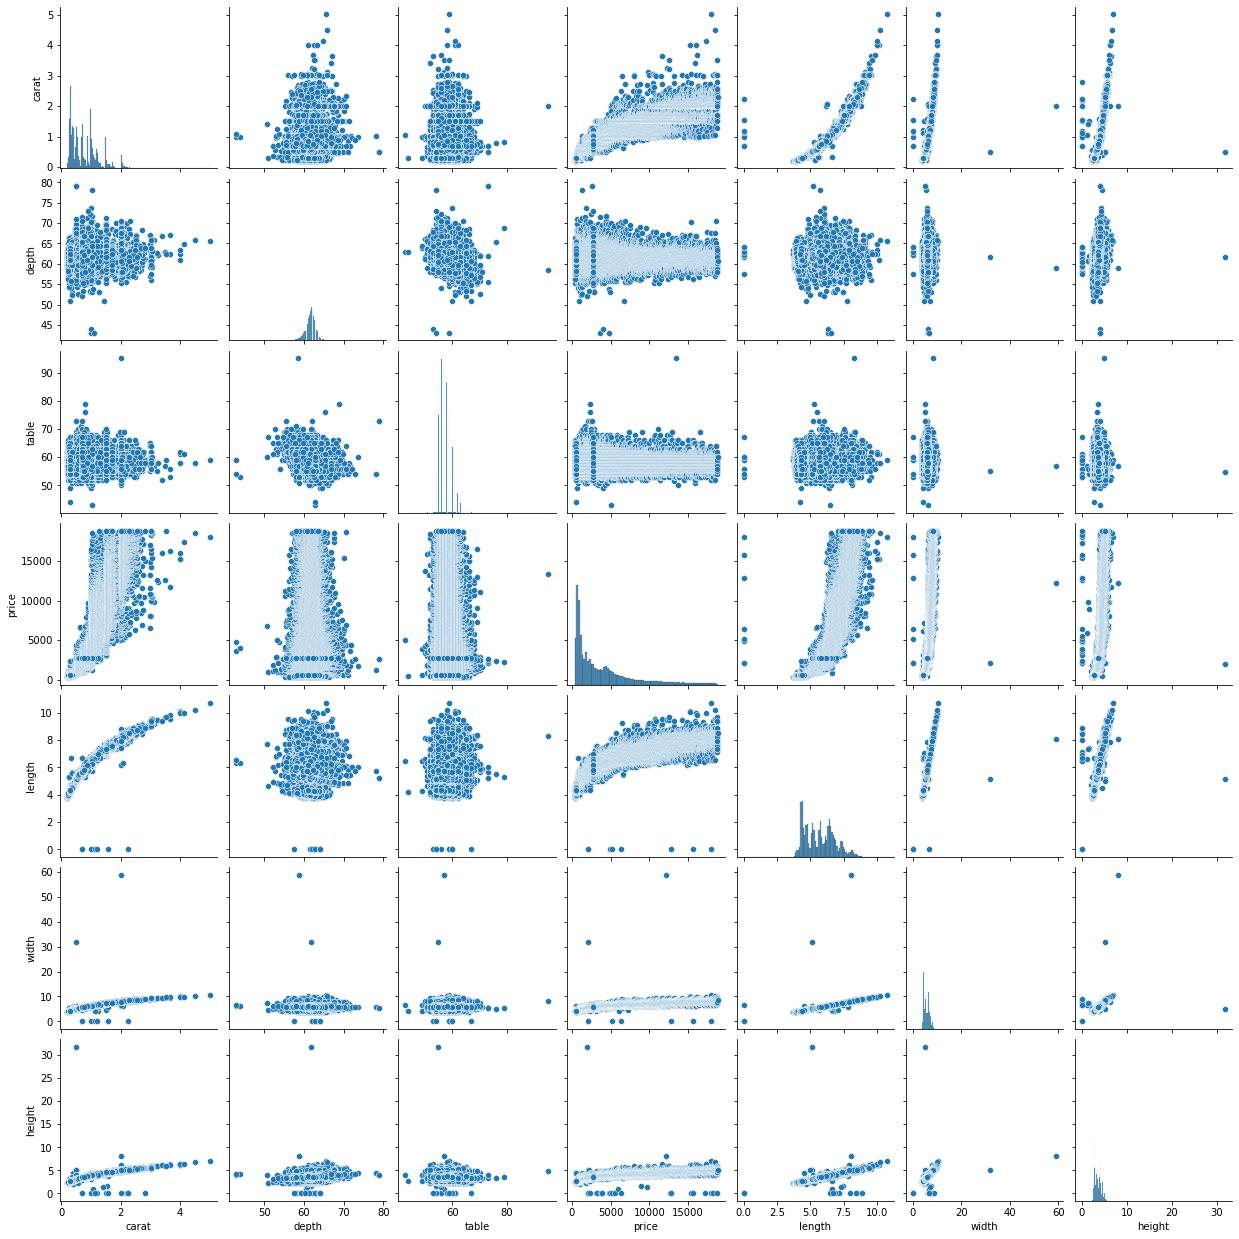

In [31]:
sns.pairplot(df[df.columns])


### Relationship between numerical and categorical features using Stripplot

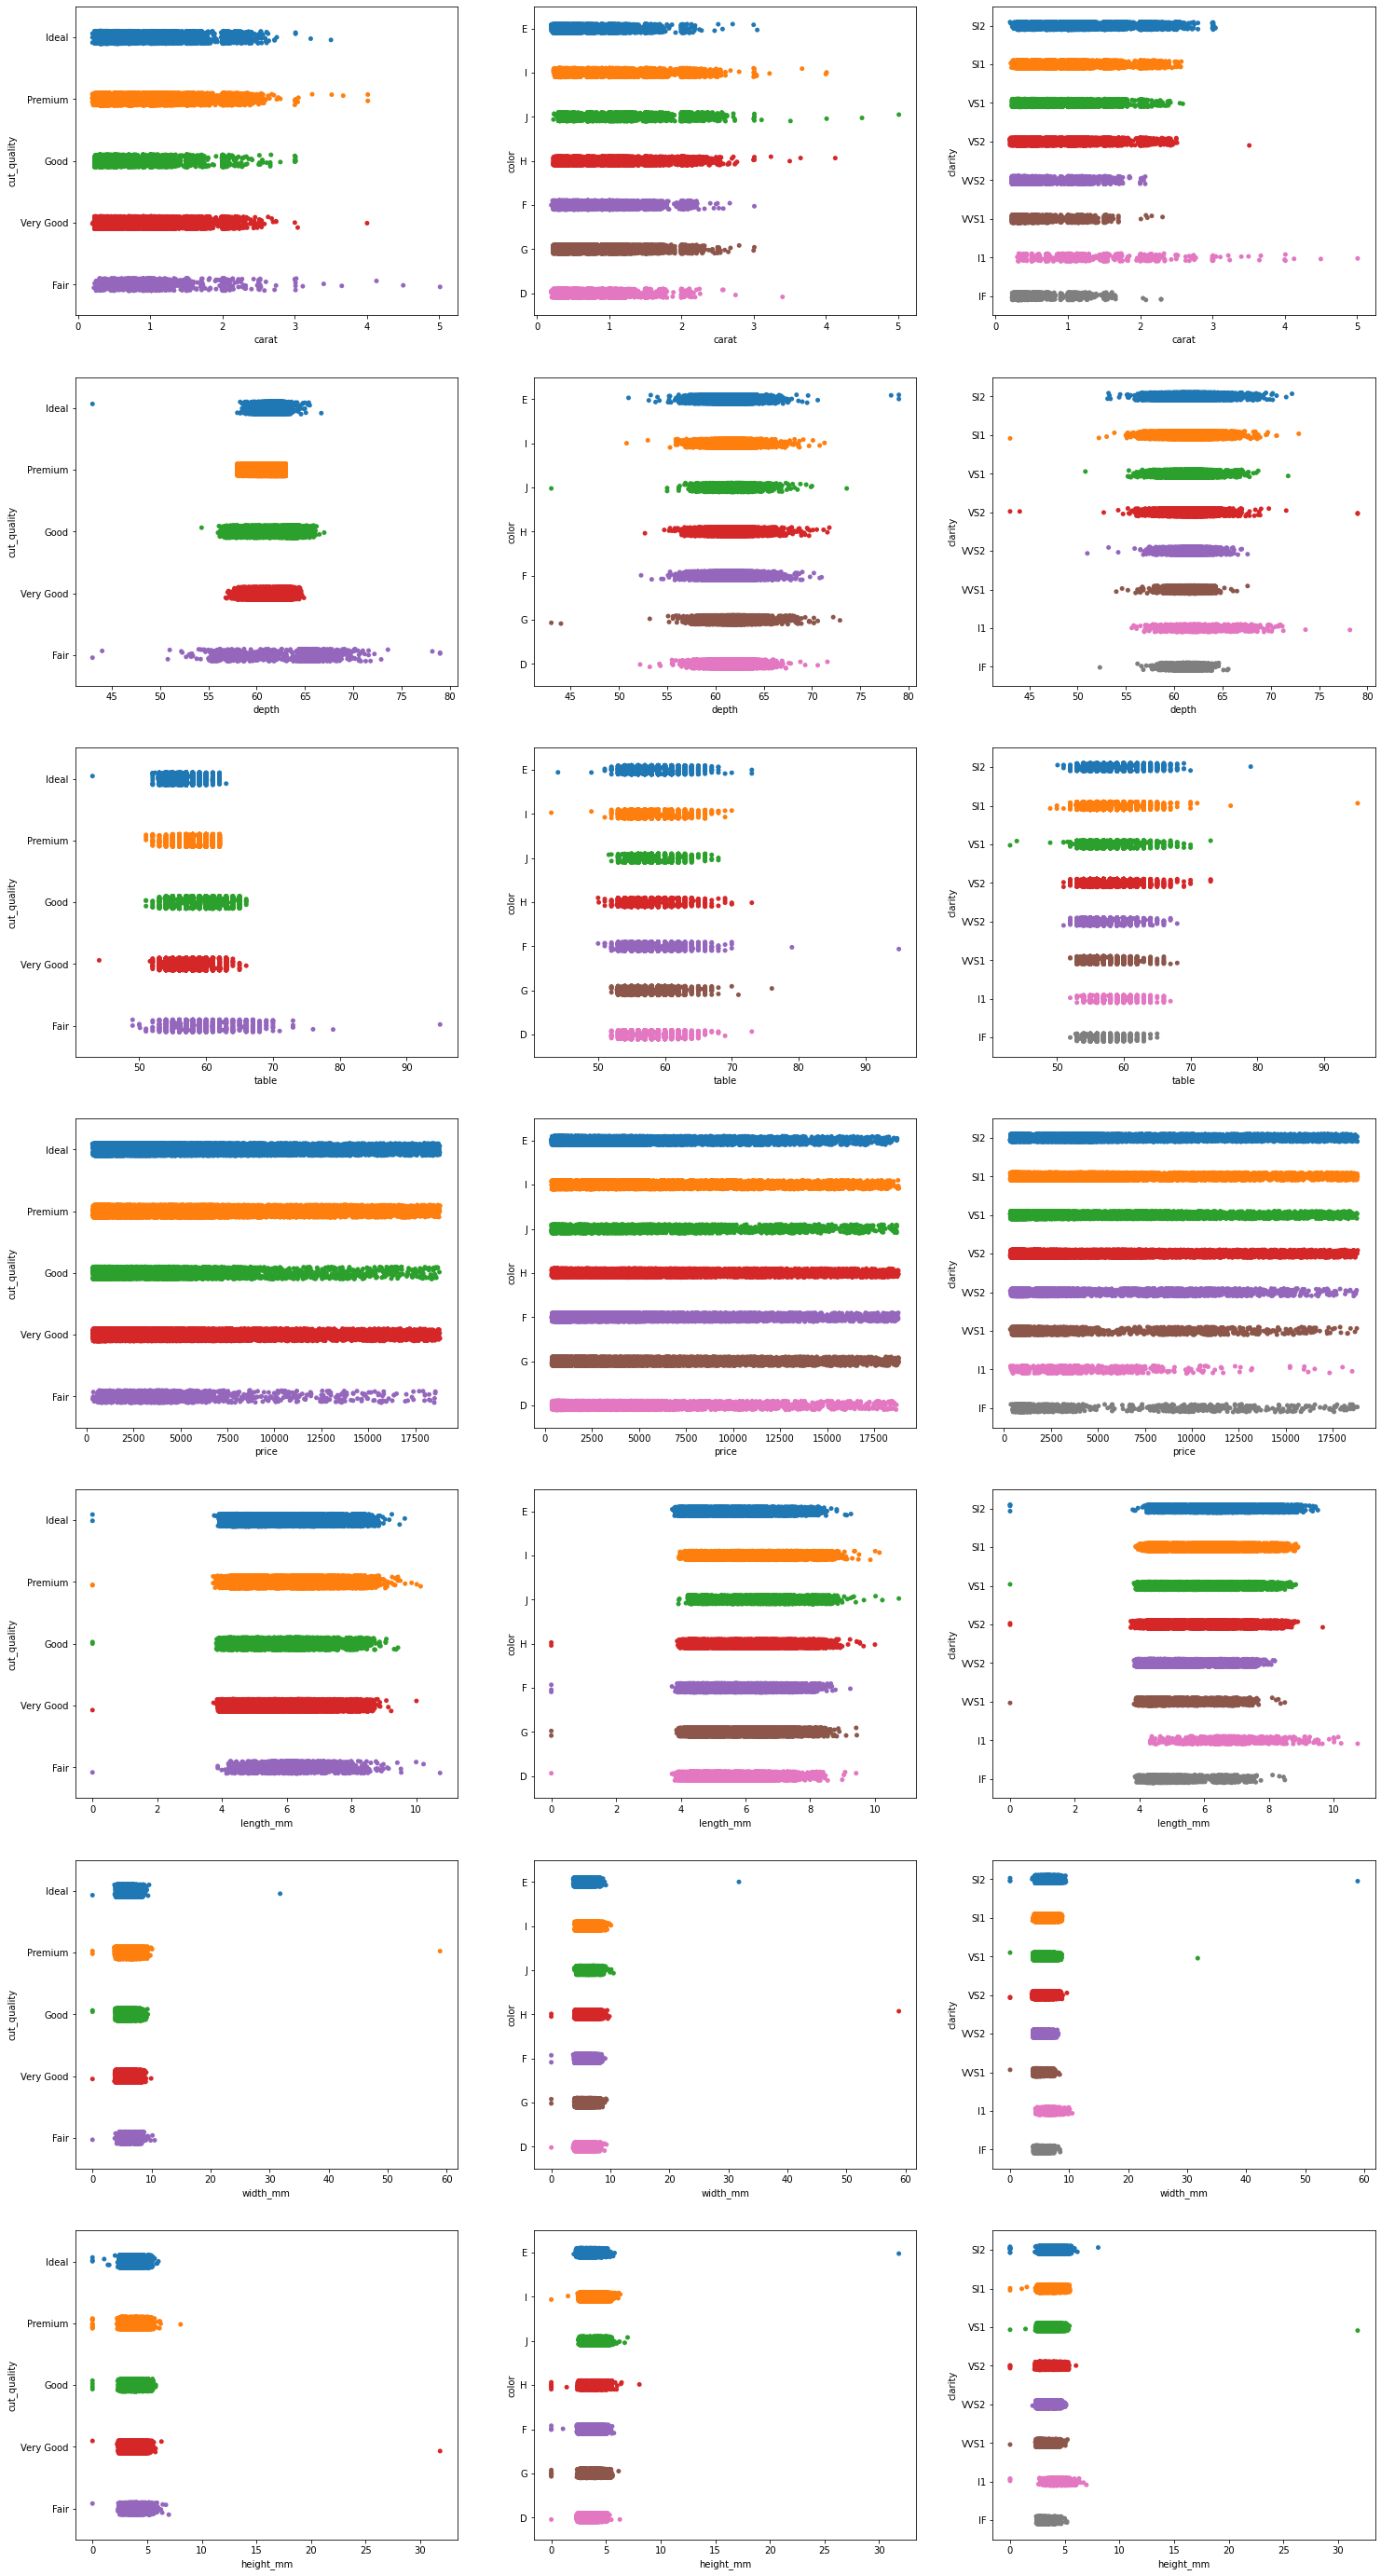

In [27]:
plt.subplots(figsize=(25, 50))
count = 1
for i in num_df.columns:
    for j in cat_df.columns:
        plt.subplot(7, 3, count)
        sns.stripplot(data=df, y=cat_df[j], x=num_df[i])
        count += 1
plt.show()


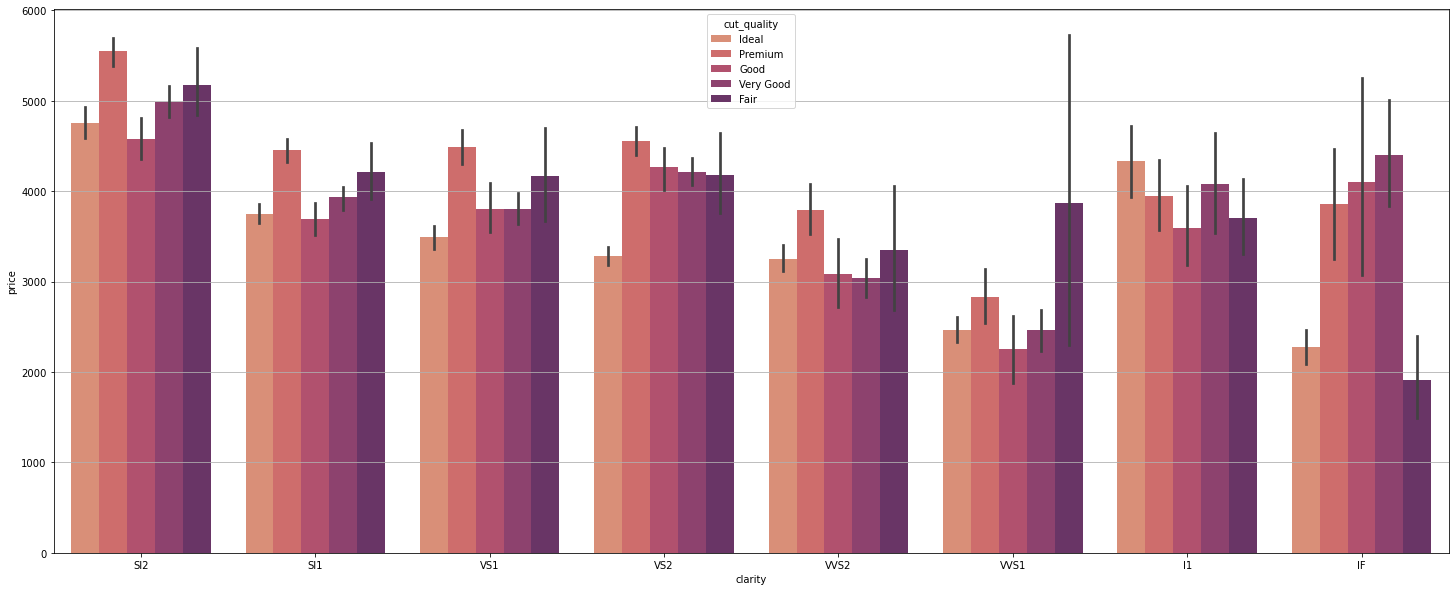

In [46]:
plt.figure(figsize=(25,10))
plt.grid()
sns.barplot(x = 'clarity',
            y = 'price',
            hue='cut_quality',
            palette = "flare",
            data = df)
plt.show()

**Observarion**:
- The price of premium is generally higher compared to the other cut quality diamonds.

# Data Preprocessing

In [28]:
num_df = df.select_dtypes(exclude=[np.object])
cat_df = df.select_dtypes(exclude=[np.float64, np.int64])

## Outliers removal

### Boxplot before IQR

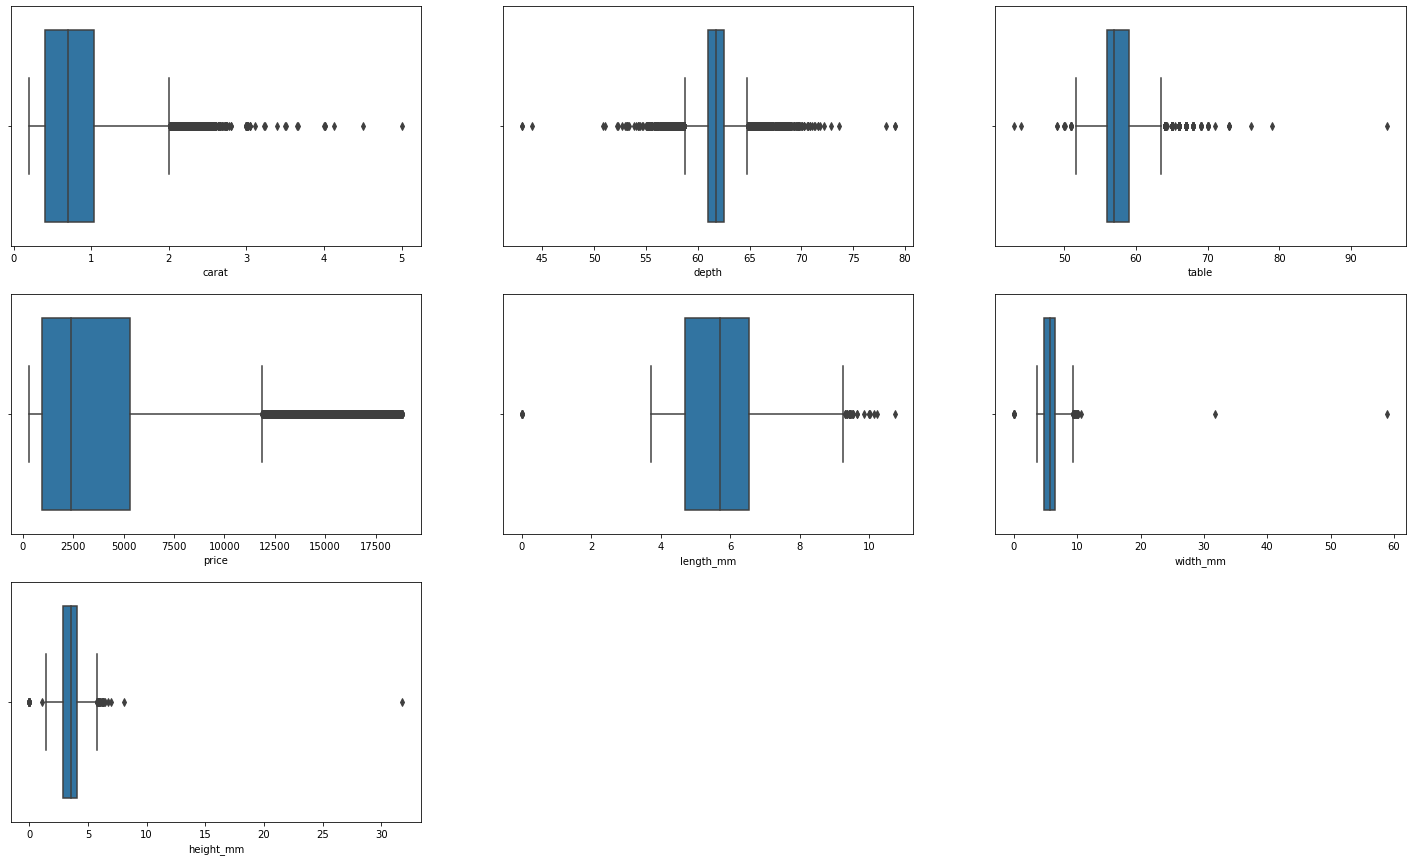

In [47]:

plt.subplots(figsize=(25, 15))
count = 1
while(count < 8):
    for i in num_df.columns:
        plt.subplot(3, 3, count)
        sns.boxplot(x=df[i])
        count += 1
plt.show()

### IQR

In [48]:
# IQR
def remove_outlier_IQR(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) -
                 np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (
        iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(
        df[field_name], 25) - iqr)].index, inplace=True)
    return df


In [49]:
print('Shape of df before IQR:',df.shape)

df2 = remove_outlier_IQR(df, 'carat')
df2 = remove_outlier_IQR(df2, 'depth')
df2 = remove_outlier_IQR(df2, 'price')
df2 = remove_outlier_IQR(df2, 'table')
df2 = remove_outlier_IQR(df2, 'height_mm')
df2 = remove_outlier_IQR(df2, 'length_mm')
df_final = remove_outlier_IQR(df2, 'width_mm')
print('Shape of df after IQR:',df_final.shape)


Shape of df before IQR: (53940, 10)
Shape of df after IQR: (46518, 10)


### Boxplot after IQR

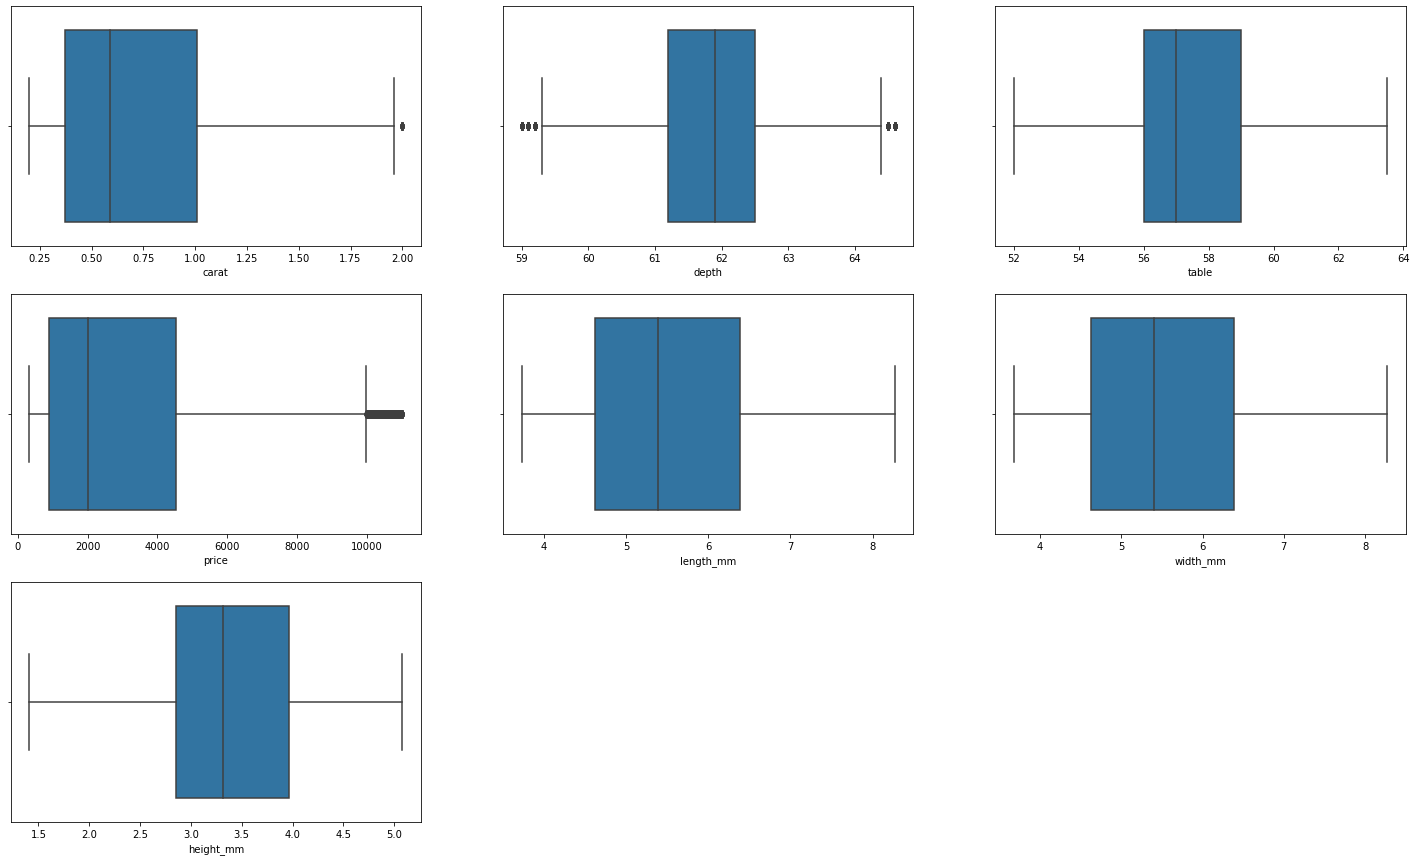

In [50]:

plt.subplots(figsize=(25, 15))
count = 1
while(count < 8):
    for i in num_df.columns:
        plt.subplot(3, 3, count)
        sns.boxplot(x=df_final[i])
        count += 1
plt.show()

## Encoding categorical features

In [51]:
print('Unique values of cat features:\n')
print('color:', cat_df.color.unique())
print('cut_quality:', cat_df.cut_quality.unique())
print('clarity:', cat_df.clarity.unique())


Unique values of cat features:

color: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
cut_quality: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
clarity: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [52]:
# Label encoding using the LabelEncoder function from sklearn
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df_final['cut_quality'] = label_encoder.fit_transform(df_final['cut_quality'])
df_final.head(2)


,carat,cut_quality,color,clarity,depth,table,price,length_mm,width_mm,height_mm
0,0.23,2,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [53]:
# using dummy variables for the remaing categories
df_final = pd.get_dummies(df_final,columns=['color','clarity'])
df_final.head()


,carat,cut_quality,depth,table,price,length_mm,width_mm,height_mm,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,2,61.5,55.0,326,3.95,3.98,2.43,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,3,59.8,61.0,326,3.89,3.84,2.31,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.29,3,62.4,58.0,334,4.20,4.23,2.63,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,1,63.3,58.0,335,4.34,4.35,2.75,0,0,...,0,1,0,0,0,1,0,0,0,0
5,0.24,4,62.8,57.0,336,3.94,3.96,2.48,0,0,...,0,1,0,0,0,0,0,0,0,1


In [54]:
df_final.shape

(46518, 23)

In [55]:
data = df_final.copy()
data.shape

(46518, 23)

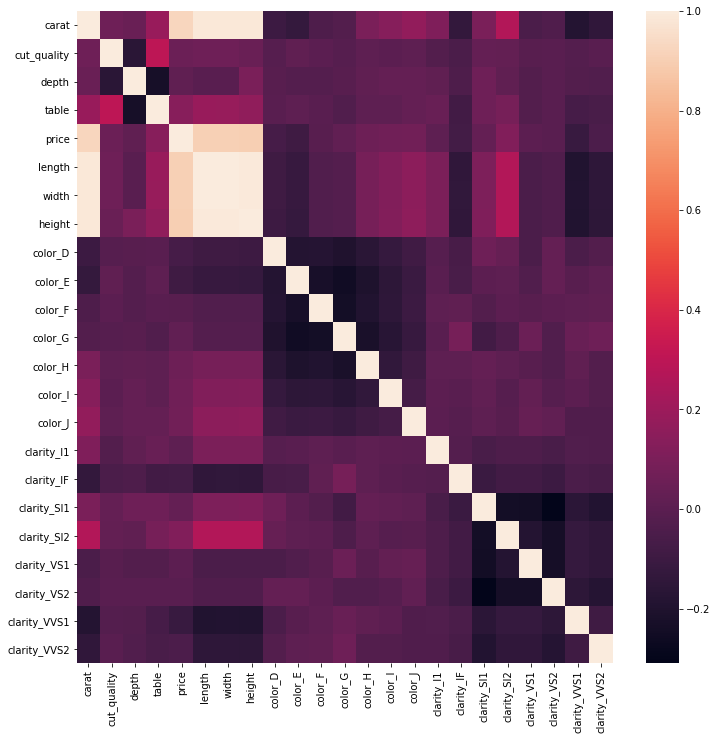

In [42]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr())
plt.show()

### Data Splitting for training and testing

In [56]:
# Using sklearn for scaling and splitting
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = data.drop(columns=['price'])
y = data['price']

# Scaling the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    scaled_df, y, test_size=0.25)
print("X train shape: {} and y train shape: {}".format(
    X_train.shape, y_train.shape))
print("X test shape: {} and y test shape: {}".format(X_test.shape, y_test.shape))

X train shape: (34888, 22) and y train shape: (34888,)
X test shape: (11630, 22) and y test shape: (11630,)


In [57]:
X_train[0]

array([ 1.4159889 ,  1.45965939, -0.28260598,  0.37824   ,  1.37872939,
        1.43404273,  1.36765511, -0.38738769, -0.48092244, -0.46557627,
       -0.51875924, -0.42016547, -0.32228186,  4.48612757, -0.10059322,
       -0.18976976, -0.56535134, -0.42929821, -0.42978973,  1.82816877,
       -0.28040727, -0.33014736])

In [58]:
y_train[0]

326

# Model Training and Evaluation

## Using sklearn

In [59]:
# Finding the optimal k value
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse_val = []  
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors=K)

    model.fit(X_train, y_train)  
    pred = model.predict(X_test)  
    error = sqrt(mean_squared_error(y_test, pred))  
    rmse_val.append(error)  
    print('RMSE value for k = ', K, 'is:', error)


RMSE value for k =  1 is: 576.8619456154358
RMSE value for k =  2 is: 511.3614501882275
RMSE value for k =  3 is: 493.9197472746704
RMSE value for k =  4 is: 488.6386594893065
RMSE value for k =  5 is: 487.2163590855905
RMSE value for k =  6 is: 488.75485935119826
RMSE value for k =  7 is: 490.23142911413174
RMSE value for k =  8 is: 496.04086753961514
RMSE value for k =  9 is: 497.1931030103399
RMSE value for k =  10 is: 500.30921985685484


In [60]:
# Using the optimal k value.
from sklearn import neighbors

model = neighbors.KNeighborsRegressor(n_neighbors=5)

model.fit(X_train, y_train)  # fit the model
pred = model.predict(X_test)
pred


array([ 960.8,  946. ,  874. , ..., 4684.6, 6503.4, 3625. ])

In [61]:
X_test[0]

array([-0.96115202, -0.66156634, -1.02522267, -0.61494224, -0.93436183,
       -0.95573319, -1.02771384, -0.38738769, -0.48092244, -0.46557627,
       -0.51875924,  2.38001469, -0.32228186, -0.2229094 , -0.10059322,
        5.26954353, -0.56535134, -0.42929821, -0.42978973, -0.54699545,
       -0.28040727, -0.33014736])

## KNN from scratch

### Convering the X_train and y_train into numpy arrays

In [62]:
train = np.array(X_train)
y_train = np.array(y_train)

# reshaping the array from columns to rows
y_train = y_train.reshape(-1, 1)

# combining the training dataset and the y_train into a matrix
train_df = np.hstack([train, y_train])
train_df[0:2]


array([[ 1.41598890e+00,  1.45965939e+00, -2.82605978e-01,
         3.78239996e-01,  1.37872939e+00,  1.43404273e+00,
         1.36765511e+00, -3.87387693e-01, -4.80922442e-01,
        -4.65576274e-01, -5.18759238e-01, -4.20165474e-01,
        -3.22281855e-01,  4.48612757e+00, -1.00593220e-01,
        -1.89769758e-01, -5.65351341e-01, -4.29298209e-01,
        -4.29789734e-01,  1.82816877e+00, -2.80407271e-01,
        -3.30147364e-01,  5.21100000e+03],
       [ 1.49891242e+00,  1.45965939e+00, -2.51045607e+00,
         2.36460446e+00,  1.59655412e+00,  1.58014257e+00,
         1.26715012e+00, -3.87387693e-01, -4.80922442e-01,
        -4.65576274e-01, -5.18759238e-01, -4.20165474e-01,
        -3.22281855e-01,  4.48612757e+00, -1.00593220e-01,
        -1.89769758e-01, -5.65351341e-01, -4.29298209e-01,
         2.32671914e+00, -5.46995450e-01, -2.80407271e-01,
        -3.30147364e-01,  5.42700000e+03]])

In [63]:
y_train[0]

array([5211], dtype=int64)

In [65]:
test = np.array(X_test)
test[0]


array([-0.96115202, -0.66156634, -1.02522267, -0.61494224, -0.93436183,
       -0.95573319, -1.02771384, -0.38738769, -0.48092244, -0.46557627,
       -0.51875924,  2.38001469, -0.32228186, -0.2229094 , -0.10059322,
        5.26954353, -0.56535134, -0.42929821, -0.42978973, -0.54699545,
       -0.28040727, -0.33014736])

In [67]:
preds = []
for i in range(len(test)):
    distances = np.sqrt(np.sum((train - test[i])**2, axis = 1))
    distances = distances.reshape(-1,1)
    matrix = np.hstack([train_df, distances])
    sorted_matrix = matrix[matrix[:,-1].argsort()]
    neighbours = [sorted_matrix[i][-2] for i in range(5)]
    pred_value = np.mean(neighbours)
    preds.append(pred_value)

knn_scratch_pred = np.array(preds)
knn_scratch_pred



array([ 960.8,  946. ,  874. , ..., 4684.6, 6503.4, 3625. ])

## Final comparision of sklearn and knn_from_scratch

In [68]:
print("Predicted values using sklearn:",pred)
print("Predicted values using knn_from_scratch:",knn_scratch_pred)

Predicted values using sklearn: [ 960.8  946.   874.  ... 4684.6 6503.4 3625. ]
Predicted values using knn_from_scratch: [ 960.8  946.   874.  ... 4684.6 6503.4 3625. ]


In [69]:
sklearn_pred = pred.reshape(-1,1)
my_knn_pred = knn_scratch_pred.reshape(-1,1)
predicted_values = np.hstack([sklearn_pred,my_knn_pred])
pred_df = pd.DataFrame(predicted_values,columns=['sklearn_preds','my_knn_preds'])
pred_df

,sklearn_preds,my_knn_preds
0,960.8,960.8
1,946.0,946.0
2,874.0,874.0
3,719.4,719.4
4,7470.2,7470.2
...,...,...
11625,828.6,828.6
11626,3845.0,3845.0
11627,4684.6,4684.6
11628,6503.4,6503.4
